HINWEIS: Sport-Daten wurden aufgrund eines identifizierten Textfehlers (falsche Spielerzuordnung) ausgeschlossen

ANOVA-Tabelle (ohne Sport):
                       sum_sq     df         F    PR(>F)
C(Autor)             5.934669    1.0  3.971151  0.048958
C(Thema)            11.351852    2.0  3.798015  0.025649
C(Autor):C(Thema)    1.048561    2.0  0.350819  0.704957
Residual           152.433437  102.0       NaN       NaN


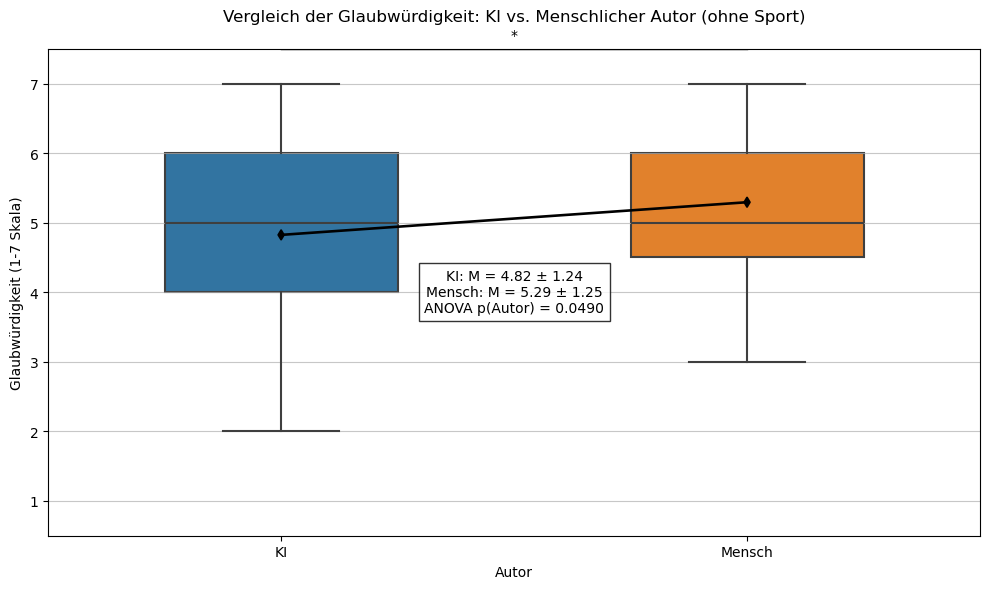


Themenspezifische Mittelwerte (ohne Sport):
                                                               mean       std
Autor  Thema                                                                 
KI     Geld - 2. Wie glaubwürdig fanden Sie den Text ?     4.947368  1.078769
       Gesundheit - 2. Wie glaubwürdig fanden Sie den ...  5.263158  1.240166
       Wissen - 2. Wie glaubwürdig fanden Sie den Text ?   4.263158  1.240166
Mensch Geld - 2. Wie glaubwürdig fanden Sie den Text ?     5.352941  1.320094
       Gesundheit - 2. Wie glaubwürdig fanden Sie den ...  5.529412  1.007326
       Wissen - 2. Wie glaubwürdig fanden Sie den Text ?   5.000000  1.414214


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

# 1. Daten laden und vorbereiten
ai_data = pd.read_csv('ai_labelled.csv')
human_data = pd.read_csv('human_labelled.csv', sep=';')
ai_data['Autor'] = 'KI'
human_data['Autor'] = 'Mensch'
data = pd.concat([ai_data, human_data])

# 2. Daten für Glaubwürdigkeit (Frage 2) umwandeln - OHNE SPORT
melted_data = pd.melt(data, id_vars=['Autor'], 
                     value_vars=[
                         'Geld - 2. Wie glaubwürdig fanden Sie den Text ?',
                         'Gesundheit - 2. Wie glaubwürdig fanden Sie den Text ?',
                         'Wissen - 2. Wie glaubwürdig fanden Sie den Text ?'  # Sport bewusst ausgeschlossen
                     ],
                     var_name='Thema',
                     value_name='Glaubwürdigkeit')

# Dokumentation des Ausschlusses
print("HINWEIS: Sport-Daten wurden aufgrund eines identifizierten Textfehlers (falsche Spielerzuordnung) ausgeschlossen\n")

# 3. ANOVA durchführen (ohne Sport)
model = ols('Glaubwürdigkeit ~ C(Autor) + C(Thema) + C(Autor):C(Thema)', data=melted_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA-Tabelle (ohne Sport):")
print(anova_table)

# 4. Vergleichsdiagramm erstellen
plt.figure(figsize=(10, 6))

# Boxplot mit Signifikanzmarkierung
ax = sns.boxplot(x='Autor', y='Glaubwürdigkeit', data=melted_data, 
                 palette={'KI': '#1f77b4', 'Mensch': '#ff7f0e'},
                 width=0.5)

# Mittelwerte als Punkte einzeichnen
sns.pointplot(x='Autor', y='Glaubwürdigkeit', data=melted_data,
              color='black', markers='d', scale=0.7, 
              errorbar=None, estimator=np.mean)

# p-Wert aus der ANOVA für den Haupteffekt "Autor" extrahieren
p_val_autor = anova_table.loc['C(Autor)', 'PR(>F)']

# Signifikanzsterne hinzufügen
y_max = melted_data['Glaubwürdigkeit'].max() + 0.5
if p_val_autor < 0.001:
    sig_symbol = '***'
elif p_val_autor < 0.01:
    sig_symbol = '**'
elif p_val_autor < 0.05:
    sig_symbol = '*'
else:
    sig_symbol = 'n.s.'

plt.plot([0, 1], [y_max, y_max], color='black', lw=1)
plt.text(0.5, y_max+0.1, sig_symbol, ha='center', va='bottom', color='black')

# Diagramm beschriften
plt.title('Vergleich der Glaubwürdigkeit: KI vs. Menschlicher Autor (ohne Sport)', pad=20)
plt.xlabel('Autor')
plt.ylabel('Glaubwürdigkeit (1-7 Skala)')
plt.ylim(0.5, 7.5)

# Deskriptive Statistiken und ANOVA-Ergebnisse anzeigen
ki_mean = melted_data[melted_data['Autor'] == 'KI']['Glaubwürdigkeit'].mean()
human_mean = melted_data[melted_data['Autor'] == 'Mensch']['Glaubwürdigkeit'].mean()
ki_std = melted_data[melted_data['Autor'] == 'KI']['Glaubwürdigkeit'].std()
human_std = melted_data[melted_data['Autor'] == 'Mensch']['Glaubwürdigkeit'].std()

plt.text(0.5, 0.5, 
         f"KI: M = {ki_mean:.2f} ± {ki_std:.2f}\nMensch: M = {human_mean:.2f} ± {human_std:.2f}\nANOVA p(Autor) = {p_val_autor:.4f}",
         ha='center', va='center', transform=ax.transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.grid(axis='y', alpha=0.7)
plt.show()

# Zusätzliche Themen-spezifische Analyse (ohne Sport)
print("\nThemenspezifische Mittelwerte (ohne Sport):")
print(melted_data.groupby(['Autor', 'Thema'])['Glaubwürdigkeit'].agg(['mean', 'std']))


--- Ergebnisse für Frage 1 (Wie viel Vorwissen haben sie zu dem Thema des Textes?) ---
t-Tests (KI vs. Mensch):
Geld: t = -0.98, p = 0.3344 | KI: M = 3.47±1.96 | Mensch: M = 4.12±1.87
Gesundheit: t = 0.76, p = 0.4523 | KI: M = 3.32±1.52 | Mensch: M = 2.94±1.35
Wissen: t = -1.05, p = 0.3004 | KI: M = 2.68±1.62 | Mensch: M = 3.29±1.74

ANOVA-Ergebnisse:
KI-Autoren: F = 1.07, p = 0.3493
Mensch-Autoren: F = 2.09, p = 0.1347


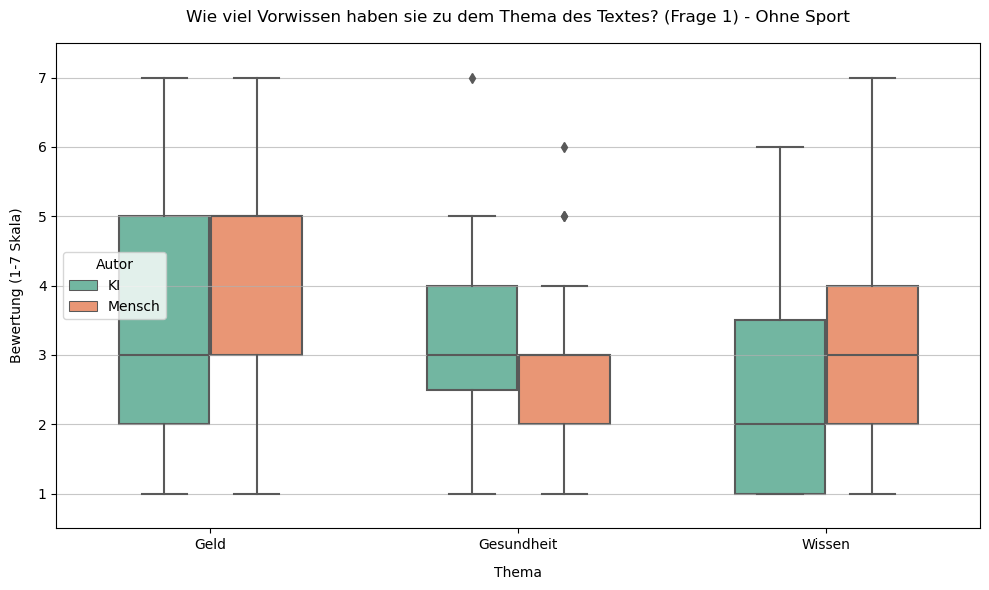


--- Ergebnisse für Frage 2 (Wie glaubwürdig fanden Sie den Text ?) ---
t-Tests (KI vs. Mensch):
Geld: t = -1.00, p = 0.3240 | KI: M = 4.95±1.05 | Mensch: M = 5.35±1.28
Gesundheit: t = -0.71, p = 0.4826 | KI: M = 5.26±1.21 | Mensch: M = 5.53±0.98
Wissen: t = -1.65, p = 0.1080 | KI: M = 4.26±1.21 | Mensch: M = 5.00±1.37

ANOVA-Ergebnisse:
KI-Autoren: F = 3.51, p = 0.0368
Mensch-Autoren: F = 0.78, p = 0.4646


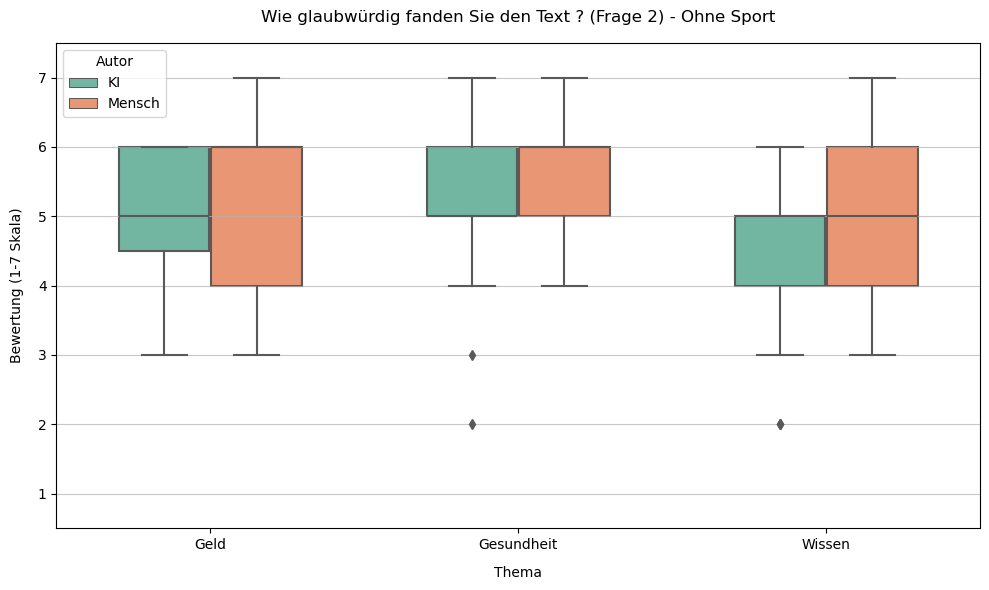


--- Ergebnisse für Frage 3 (Wie klar und verständlich war der Text?) ---
t-Tests (KI vs. Mensch):
Geld: t = -0.06, p = 0.9504 | KI: M = 4.79±1.20 | Mensch: M = 4.82±1.85
Gesundheit: t = -2.97, p = 0.0061 | KI: M = 5.53±1.19 | Mensch: M = 6.47±0.61
Wissen: t = -2.66, p = 0.0123 | KI: M = 4.63±0.93 | Mensch: M = 5.59±1.14

ANOVA-Ergebnisse:
KI-Autoren: F = 3.33, p = 0.0434
Mensch-Autoren: F = 6.38, p = 0.0035


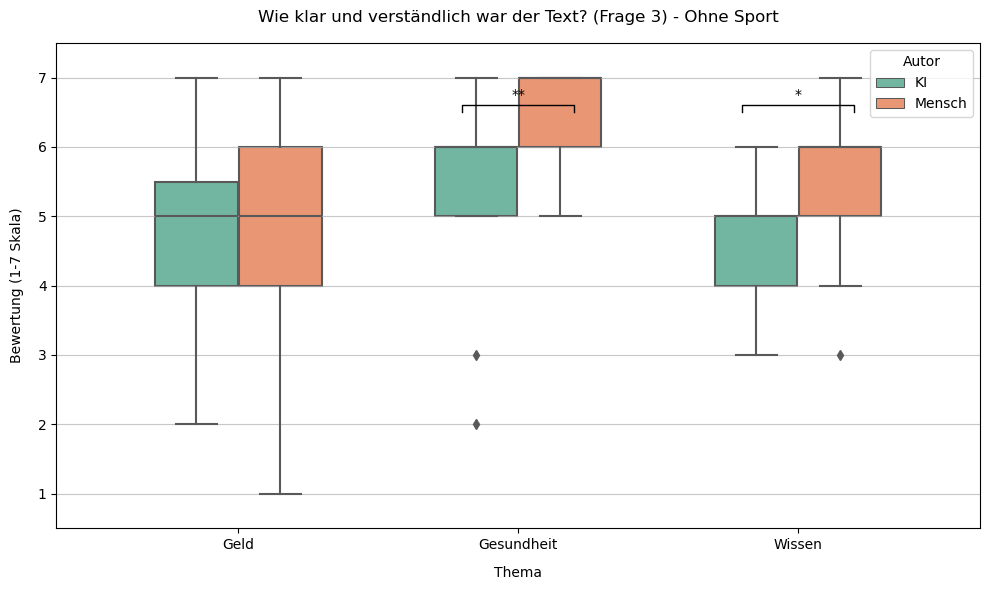


--- Ergebnisse für Frage 4 (Wie interessant fanden Sie den Text?) ---
t-Tests (KI vs. Mensch):
Geld: t = -0.15, p = 0.8794 | KI: M = 4.32±1.69 | Mensch: M = 4.41±1.94
Gesundheit: t = -0.34, p = 0.7376 | KI: M = 4.89±1.65 | Mensch: M = 5.06±1.16
Wissen: t = -0.49, p = 0.6309 | KI: M = 4.32±1.13 | Mensch: M = 4.59±1.97

ANOVA-Ergebnisse:
KI-Autoren: F = 0.88, p = 0.4199
Mensch-Autoren: F = 0.60, p = 0.5550


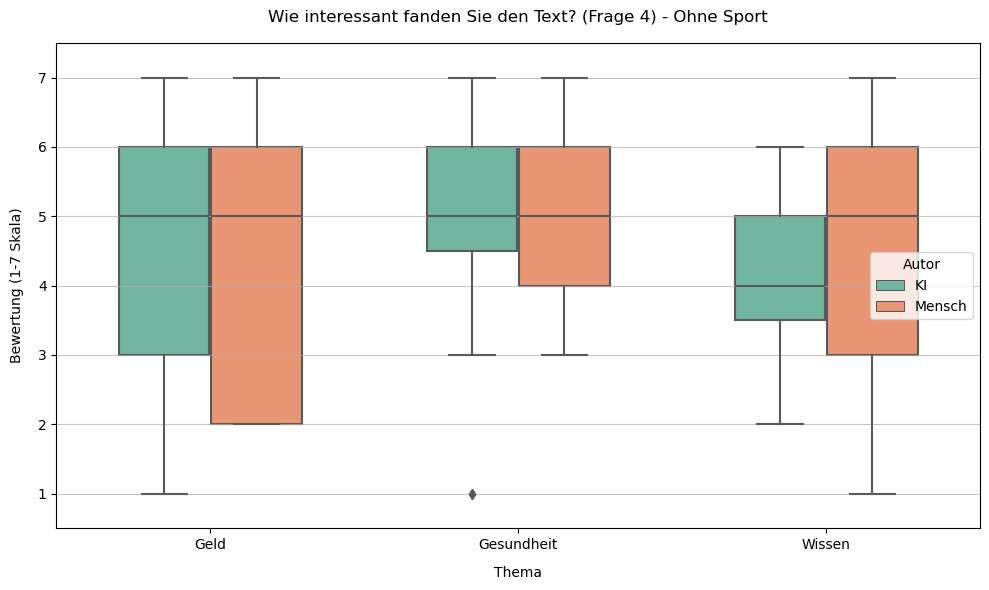


--- Ergebnisse für Frage 5 (Wie viel Vertrauen haben Sie in den Inhalt des Textes?) ---
t-Tests (KI vs. Mensch):
Geld: t = -0.67, p = 0.5103 | KI: M = 4.42±1.53 | Mensch: M = 4.76±1.48
Gesundheit: t = -1.32, p = 0.1969 | KI: M = 4.47±1.43 | Mensch: M = 5.06±1.16
Wissen: t = -2.16, p = 0.0383 | KI: M = 3.53±1.27 | Mensch: M = 4.53±1.42

ANOVA-Ergebnisse:
KI-Autoren: F = 2.55, p = 0.0875
Mensch-Autoren: F = 0.61, p = 0.5479


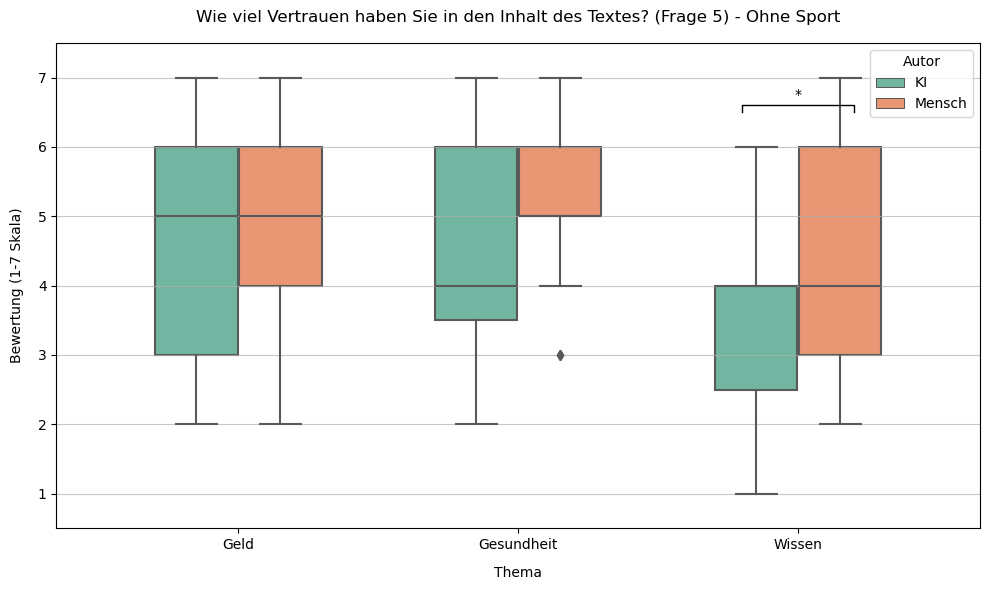


--- Ergebnisse für Frage 6 (Wie sachlich fanden sie den Text?) ---
t-Tests (KI vs. Mensch):
Geld: t = -0.80, p = 0.4293 | KI: M = 5.26±1.33 | Mensch: M = 5.59±1.03
Gesundheit: t = -0.89, p = 0.3780 | KI: M = 5.42±0.82 | Mensch: M = 5.71±1.02
Wissen: t = -0.97, p = 0.3395 | KI: M = 3.79±1.54 | Mensch: M = 4.35±1.81

ANOVA-Ergebnisse:
KI-Autoren: F = 9.08, p = 0.0004
Mensch-Autoren: F = 5.01, p = 0.0106


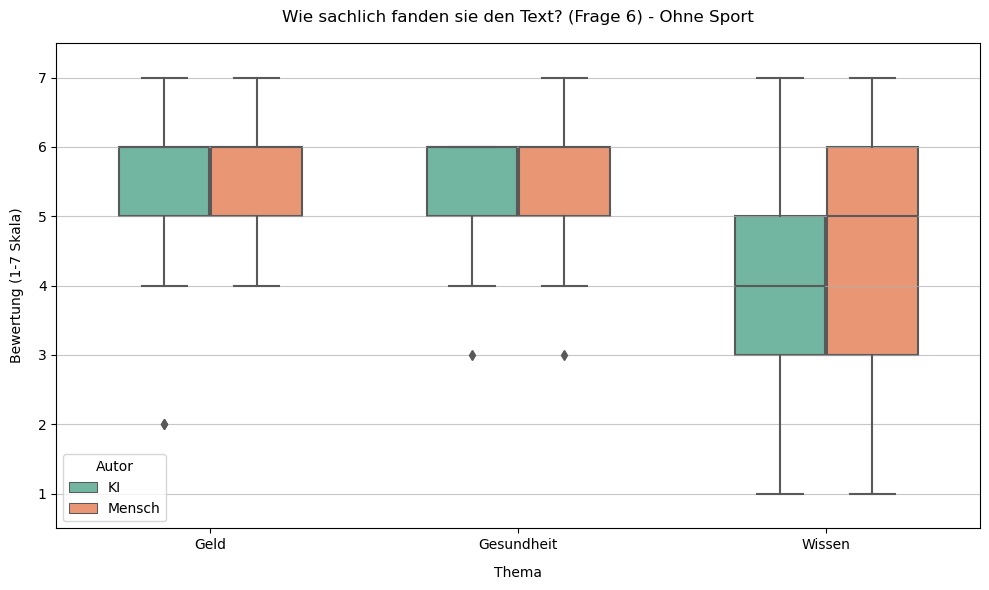


--- Ergebnisse für Frage 7 (Haben Sie den Eindruck, dass der Autor Fachkompetenz besitzt?) ---
t-Tests (KI vs. Mensch):
Geld: t = -0.87, p = 0.3901 | KI: M = 4.89±1.37 | Mensch: M = 5.24±0.88
Gesundheit: t = -0.87, p = 0.3915 | KI: M = 5.11±1.25 | Mensch: M = 5.41±0.77
Wissen: t = 0.08, p = 0.9368 | KI: M = 4.21±1.06 | Mensch: M = 4.18±1.38

ANOVA-Ergebnisse:
KI-Autoren: F = 2.59, p = 0.0844
Mensch-Autoren: F = 6.55, p = 0.0031


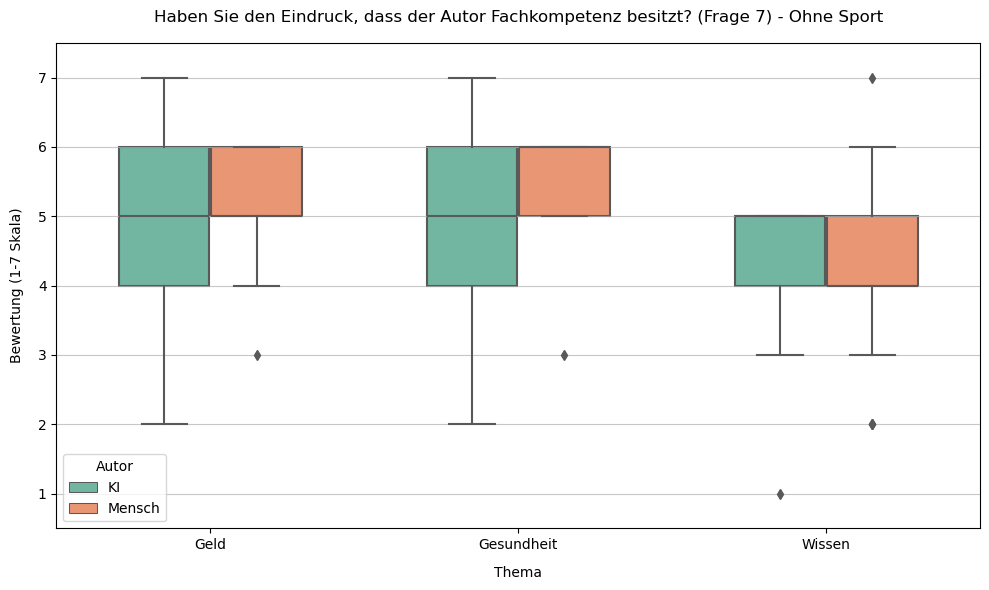


--- Ergebnisse für Frage 8 (Wie sehr vertrauen Sie den im Text präsentierten Informationen?) ---
t-Tests (KI vs. Mensch):
Geld: t = -1.37, p = 0.1809 | KI: M = 4.37±1.46 | Mensch: M = 5.00±1.24
Gesundheit: t = -2.31, p = 0.0277 | KI: M = 4.37±1.53 | Mensch: M = 5.35±0.90
Wissen: t = -1.59, p = 0.1211 | KI: M = 3.37±1.49 | Mensch: M = 4.18±1.46

ANOVA-Ergebnisse:
KI-Autoren: F = 2.69, p = 0.0772
Mensch-Autoren: F = 3.90, p = 0.0271


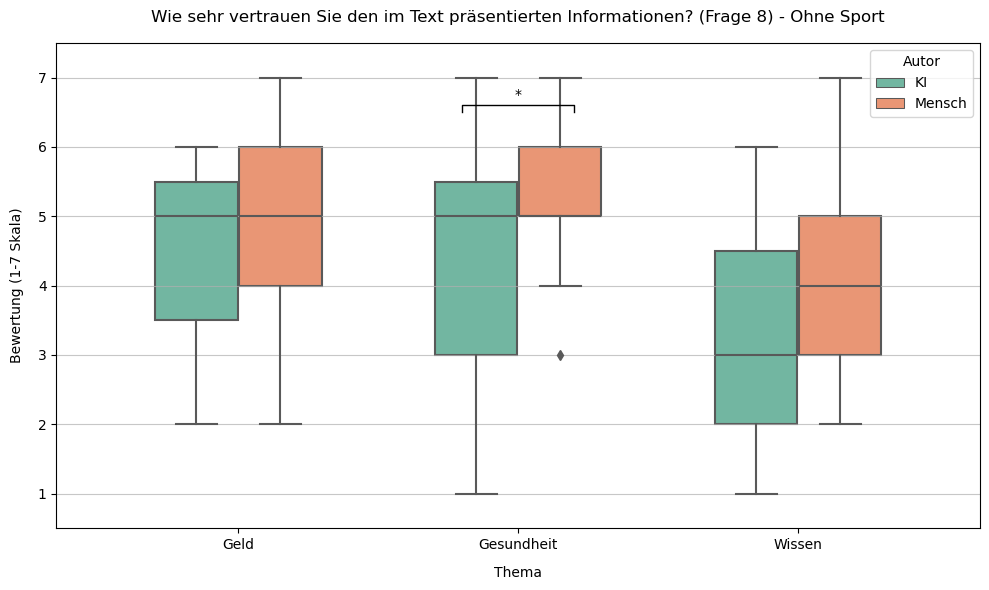


--- Ergebnisse für Frage 9 (Wie wahrscheinlich ist es, dass der Text missverstanden werden könnte?) ---
t-Tests (KI vs. Mensch):
Geld: t = -0.14, p = 0.8911 | KI: M = 3.05±1.28 | Mensch: M = 3.12±1.45
Gesundheit: t = 1.16, p = 0.2521 | KI: M = 2.74±1.02 | Mensch: M = 2.35±0.90
Wissen: t = 0.53, p = 0.6014 | KI: M = 3.37±1.49 | Mensch: M = 3.12±1.28

ANOVA-Ergebnisse:
KI-Autoren: F = 1.10, p = 0.3404
Mensch-Autoren: F = 2.05, p = 0.1393


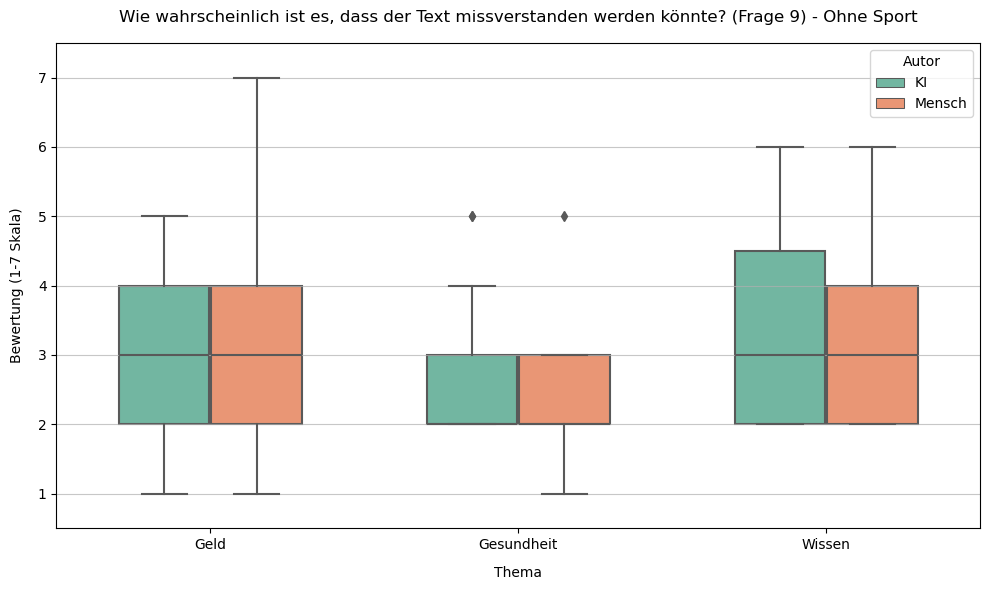


HINWEIS: Sport-Daten wurden in allen Analysen aufgrund eines identifizierten Textfehlers (falsche Spielerzuordnung) ausgeschlossen


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Daten laden und vorbereiten
ai_data = pd.read_csv('ai_labelled.csv')
human_data = pd.read_csv('human_labelled.csv', sep=';')
ai_data['Autor'] = 'KI'
human_data['Autor'] = 'Mensch'
data = pd.concat([ai_data, human_data])

# Fragenkatalog (ohne Frage 2, da bereits analysiert)
questions = {
    1: "Wie viel Vorwissen haben sie zu dem Thema des Textes?",
    2: "Wie glaubwürdig fanden Sie den Text ?",
    3: "Wie klar und verständlich war der Text?",
    4: "Wie interessant fanden Sie den Text?",
    5: "Wie viel Vertrauen haben Sie in den Inhalt des Textes?",
    6: "Wie sachlich fanden sie den Text?",
    7: "Haben Sie den Eindruck, dass der Autor Fachkompetenz besitzt?",
    8: "Wie sehr vertrauen Sie den im Text präsentierten Informationen?",
    9: "Wie wahrscheinlich ist es, dass der Text missverstanden werden könnte?"
}

# Analysefunktion (ohne Sport)
def analyze_question(question_num, question_text):
    # Daten extrahieren (Sport explizit ausschließen)
    melted_data = pd.melt(data, id_vars=['Autor'], 
                        value_vars=[
                            f'Geld - {question_num}. {question_text}',
                            f'Gesundheit - {question_num}. {question_text}',
                            f'Wissen - {question_num}. {question_text}'  # Kein Sport
                        ],
                        var_name='Frage', 
                        value_name='Bewertung')
    
    # Thema extrahieren
    melted_data['Thema'] = melted_data['Frage'].str.extract(r'(Geld|Gesundheit|Wissen)')
    
    # Boxplot erstellen
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Thema', y='Bewertung', hue='Autor', 
               data=melted_data, palette='Set2', width=0.6,
               order=['Geld', 'Gesundheit', 'Wissen'])
    plt.title(f'{question_text} (Frage {question_num}) - Ohne Sport', pad=15)
    plt.xlabel('Thema', labelpad=10)
    plt.ylabel('Bewertung (1-7 Skala)', labelpad=10)
    plt.ylim(0.5, 7.5)
    plt.legend(title='Autor')
    
    # Signifikanzmarkierung
    def annotate_significance(x1, x2, y, p):
        if p < 0.001:
            symbol = '***'
        elif p < 0.01:
            symbol = '**'
        elif p < 0.05:
            symbol = '*'
        else:
            return
        plt.plot([x1, x1, x2, x2], [y, y+0.1, y+0.1, y], lw=1, color='black')
        plt.text((x1+x2)*0.5, y+0.15, symbol, ha='center', va='bottom', color='black')
    
    # t-Tests pro Thema (KI vs. Mensch)
    y_pos = 6.5
    themen = ['Geld', 'Gesundheit', 'Wissen']
    print(f"\n--- Ergebnisse für Frage {question_num} ({question_text}) ---")
    print("t-Tests (KI vs. Mensch):")
    for i, thema in enumerate(themen):
        ki = melted_data[(melted_data['Autor'] == 'KI') & 
                        (melted_data['Thema'] == thema)]['Bewertung']
        mensch = melted_data[(melted_data['Autor'] == 'Mensch') & 
                            (melted_data['Thema'] == thema)]['Bewertung']
        
        # Welch's t-Test (ungleiche Varianzen annehmen)
        t_stat, p_val = stats.ttest_ind(ki, mensch, nan_policy='omit', equal_var=False)
        print(f"{thema}: t = {t_stat:.2f}, p = {p_val:.4f} | KI: M = {np.mean(ki):.2f}±{np.std(ki):.2f} | Mensch: M = {np.mean(mensch):.2f}±{np.std(mensch):.2f}")
        annotate_significance(i-0.2, i+0.2, y_pos, p_val)
    
    # ANOVA für Themenunterschiede (getrennt nach Autor)
    print("\nANOVA-Ergebnisse:")
    for autor in ['KI', 'Mensch']:
        autor_data = melted_data[melted_data['Autor'] == autor]
        groups = [autor_data[autor_data['Thema'] == t]['Bewertung'] for t in themen]
        f_stat, p_val = stats.f_oneway(*groups)
        print(f"{autor}-Autoren: F = {f_stat:.2f}, p = {p_val:.4f}")
    
    plt.tight_layout()
    plt.grid(axis='y', alpha=0.7)
    plt.show()

# Alle Fragen analysieren
for q_num, q_text in questions.items():
    analyze_question(q_num, q_text)

print("\nHINWEIS: Sport-Daten wurden in allen Analysen aufgrund eines identifizierten Textfehlers (falsche Spielerzuordnung) ausgeschlossen")

Durchschnittliche Glaubwürdigkeit (AI): 4.7061403508771935
Durchschnittliche Glaubwürdigkeit (Mensch): 5.102941176470588

Statistische Signifikanz:
AI: r = 0.459, p = 0.0480
Mensch: r = 0.375, p = 0.1385

Interpretation:
AI-Korrelation: * (p < 0.05)
Mensch-Korrelation: n.s. (nicht signifikant)


/var/folders/fg/mnsxwcgd44d0d911s38ny_f80000gn/T/ipykernel_79810/1041304432.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ai_glaubwuerdigkeit['Durchschnitt'] = ai_glaubwuerdigkeit.mean(axis=1)
/var/folders/fg/mnsxwcgd44d0d911s38ny_f80000gn/T/ipykernel_79810/1041304432.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_glaubwuerdigkeit['Durchschnitt'] = human_glaubwuerdigkeit.mean(axis=1)


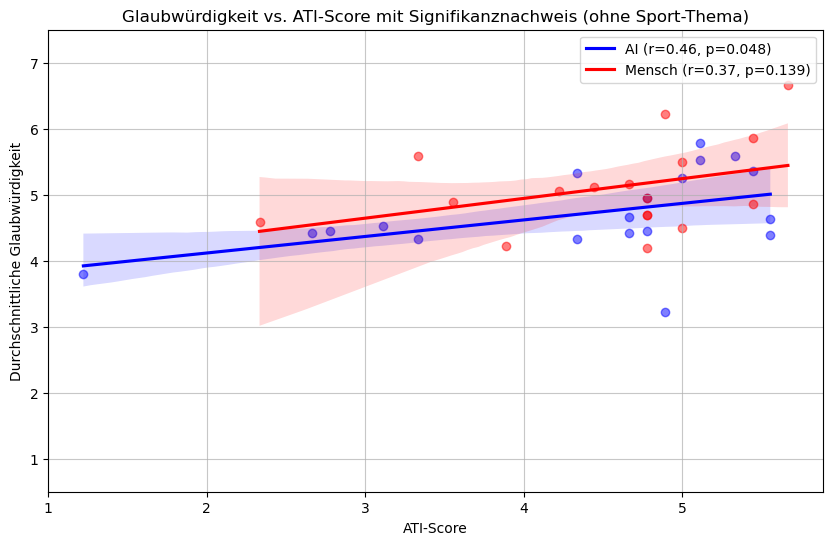

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Daten laden
ai_data = pd.read_csv('ai_labelled_with_ati.csv')
human_data = pd.read_csv('human_labelled_with_ati.csv')

# Relevante Spalten extrahieren
ai_glaubwuerdigkeit = ai_data[['Geld - 2. Wie glaubwürdig fanden Sie den Text ?', 
                               'Gesundheit - 2. Wie glaubwürdig fanden Sie den Text ?', 
                               'Wissen - 2. Wie glaubwürdig fanden Sie den Text ?', 
                               'ATI_Score']]

human_glaubwuerdigkeit = human_data[['Geld - 2. Wie glaubwürdig fanden Sie den Text ?', 
                                     'Gesundheit - 2. Wie glaubwürdig fanden Sie den Text ?', 
                                     'Wissen - 2. Wie glaubwürdig fanden Sie den Text ?', 
                                     'ATI_Score']]

# Durchschnittliche Glaubwürdigkeit berechnen
ai_glaubwuerdigkeit['Durchschnitt'] = ai_glaubwuerdigkeit.mean(axis=1)
human_glaubwuerdigkeit['Durchschnitt'] = human_glaubwuerdigkeit.mean(axis=1)

# Vergleich der durchschnittlichen Glaubwürdigkeit
print("Durchschnittliche Glaubwürdigkeit (AI):", ai_glaubwuerdigkeit['Durchschnitt'].mean())
print("Durchschnittliche Glaubwürdigkeit (Mensch):", human_glaubwuerdigkeit['Durchschnitt'].mean())



# Korrelationen berechnen
ai_korrelation = ai_glaubwuerdigkeit['Durchschnitt'].corr(ai_glaubwuerdigkeit['ATI_Score'])
human_korrelation = human_glaubwuerdigkeit['Durchschnitt'].corr(human_glaubwuerdigkeit['ATI_Score'])

# Funktion für Korrelationstest mit p-Wert
def correlation_test(x, y):
    r, p = stats.pearsonr(x, y)
    return r, p

# Signifikanztests für beide Gruppen
ai_r, ai_p = correlation_test(ai_glaubwuerdigkeit['ATI_Score'], 
                             ai_glaubwuerdigkeit['Durchschnitt'])
human_r, human_p = correlation_test(human_glaubwuerdigkeit['ATI_Score'], 
                                   human_glaubwuerdigkeit['Durchschnitt'])

# Ergebnisse ausgeben
print("\nStatistische Signifikanz:")
print(f"AI: r = {ai_r:.3f}, p = {ai_p:.4f}")
print(f"Mensch: r = {human_r:.3f}, p = {human_p:.4f}")

# Interpretation hinzufügen
def interpret_p_value(p):
    if p < 0.001:
        return "*** (p < 0.001)"
    elif p < 0.01:
        return "** (p < 0.01)"
    elif p < 0.05:
        return "* (p < 0.05)"
    else:
        return "n.s. (nicht signifikant)"

print("\nInterpretation:")
print(f"AI-Korrelation: {interpret_p_value(ai_p)}")
print(f"Mensch-Korrelation: {interpret_p_value(human_p)}")

# Signifikanz im Plot annotieren
plt.figure(figsize=(10, 6))

# AI-Daten
sns.regplot(x='ATI_Score', y='Durchschnitt', data=ai_glaubwuerdigkeit, 
            scatter_kws={'color': 'blue', 'alpha': 0.5}, 
            line_kws={'color': 'blue', 'label': f'AI (r={ai_r:.2f}, p={ai_p:.3f})'})

# Mensch-Daten
sns.regplot(x='ATI_Score', y='Durchschnitt', data=human_glaubwuerdigkeit, 
            scatter_kws={'color': 'red', 'alpha': 0.5}, 
            line_kws={'color': 'red', 'label': f'Mensch (r={human_r:.2f}, p={human_p:.3f})'})

plt.ylim(0.5, 7.5)
plt.grid(axis='both', alpha=0.7)
plt.xlabel('ATI-Score')
plt.ylabel('Durchschnittliche Glaubwürdigkeit')
plt.title('Glaubwürdigkeit vs. ATI-Score mit Signifikanznachweis (ohne Sport-Thema)')
plt.legend()
plt.show()


--- Frage 1: Vorwissen ---
Deskriptive Statistiken:
            count      mean       std  min  25%  50%  75%  max
Thema                                                         
Geld         36.0  3.777778  1.972831  1.0  2.0  4.5  5.0  7.0
Gesundheit   36.0  3.138889  1.476536  1.0  2.0  3.0  4.0  7.0
Wissen       36.0  2.972222  1.731822  1.0  2.0  3.0  4.0  7.0

ANOVA: F = 2.15, p = 0.1213


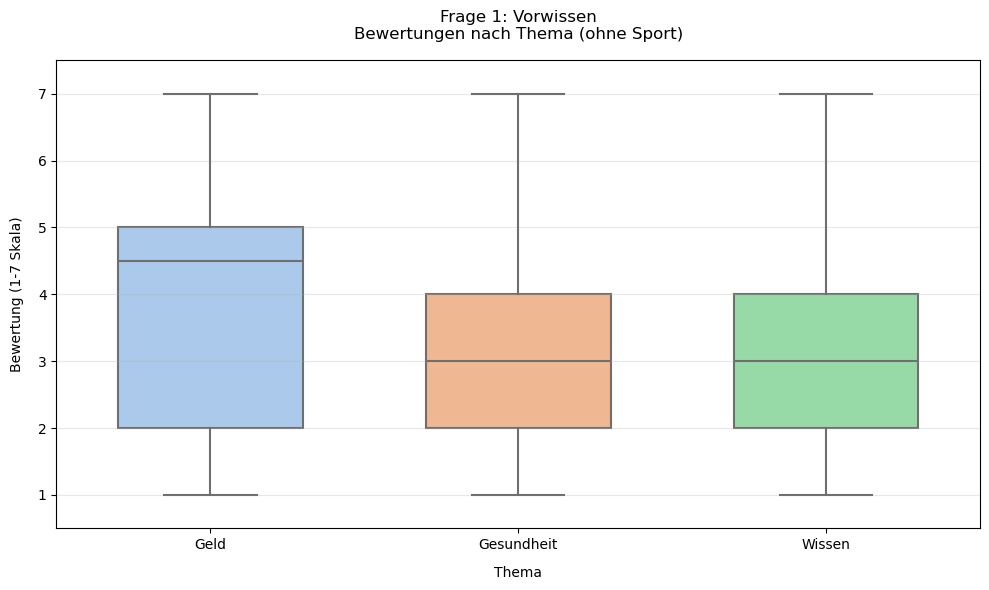


--- Frage 2: Glaubwürdigkeit ---
Deskriptive Statistiken:
            count      mean       std  min  25%  50%  75%  max
Thema                                                         
Geld         36.0  5.138889  1.198875  3.0  4.0  5.0  6.0  7.0
Gesundheit   36.0  5.388889  1.128280  2.0  5.0  5.5  6.0  7.0
Wissen       36.0  4.611111  1.358103  2.0  4.0  5.0  5.0  7.0

ANOVA: F = 3.74, p = 0.0270

Post-hoc Tukey HSD Tests:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
      Geld Gesundheit     0.25 0.6661 -0.4405  0.9405  False
      Geld     Wissen  -0.5278 0.1689 -1.2182  0.1627  False
Gesundheit     Wissen  -0.7778 0.0232 -1.4682 -0.0873   True
------------------------------------------------------------


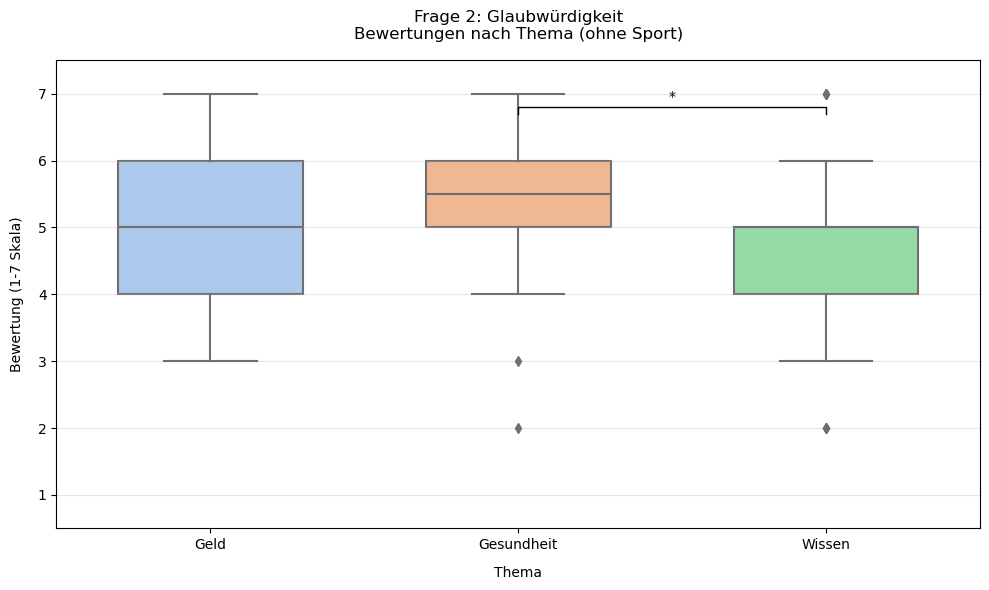


--- Frage 3: Verständlichkeit ---
Deskriptive Statistiken:
            count      mean       std  min  25%  50%  75%  max
Thema                                                         
Geld         36.0  4.805556  1.564233  1.0  4.0  5.0  6.0  7.0
Gesundheit   36.0  5.972222  1.081959  2.0  6.0  6.0  7.0  7.0
Wissen       36.0  5.083333  1.155731  3.0  4.0  5.0  6.0  7.0

ANOVA: F = 8.10, p = 0.0005

Post-hoc Tukey HSD Tests:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
      Geld Gesundheit   1.1667 0.0006  0.4466  1.8867   True
      Geld     Wissen   0.2778 0.6307 -0.4422  0.9978  False
Gesundheit     Wissen  -0.8889 0.0113 -1.6089 -0.1689   True
------------------------------------------------------------


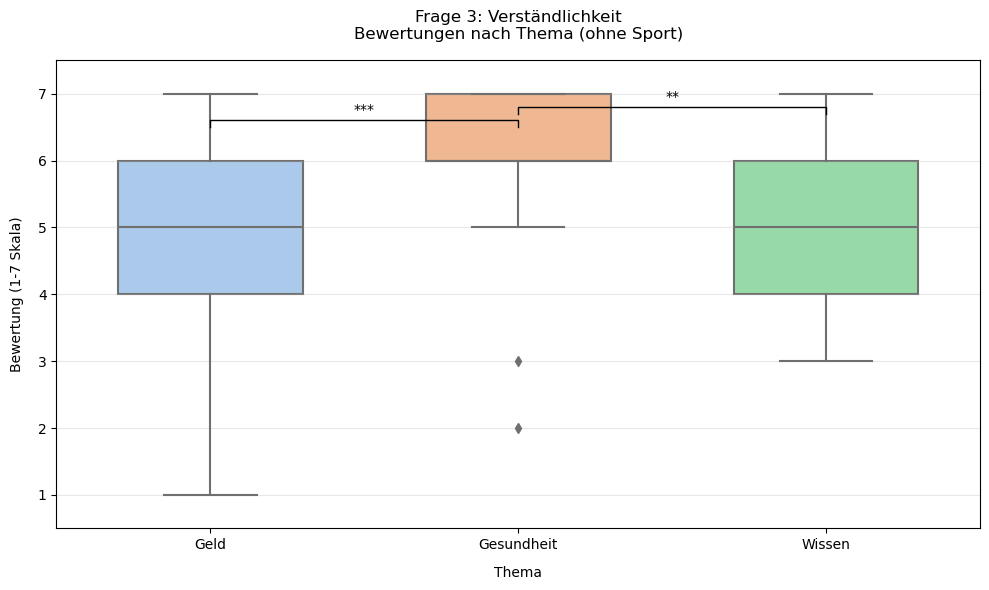


--- Frage 4: Interessantheit ---
Deskriptive Statistiken:
            count      mean       std  min  25%  50%  75%  max
Thema                                                         
Geld         36.0  4.361111  1.838521  1.0  2.0  5.0  6.0  7.0
Gesundheit   36.0  4.972222  1.463579  1.0  4.0  5.0  6.0  7.0
Wissen       36.0  4.444444  1.611467  1.0  3.0  4.5  6.0  7.0

ANOVA: F = 1.46, p = 0.2367


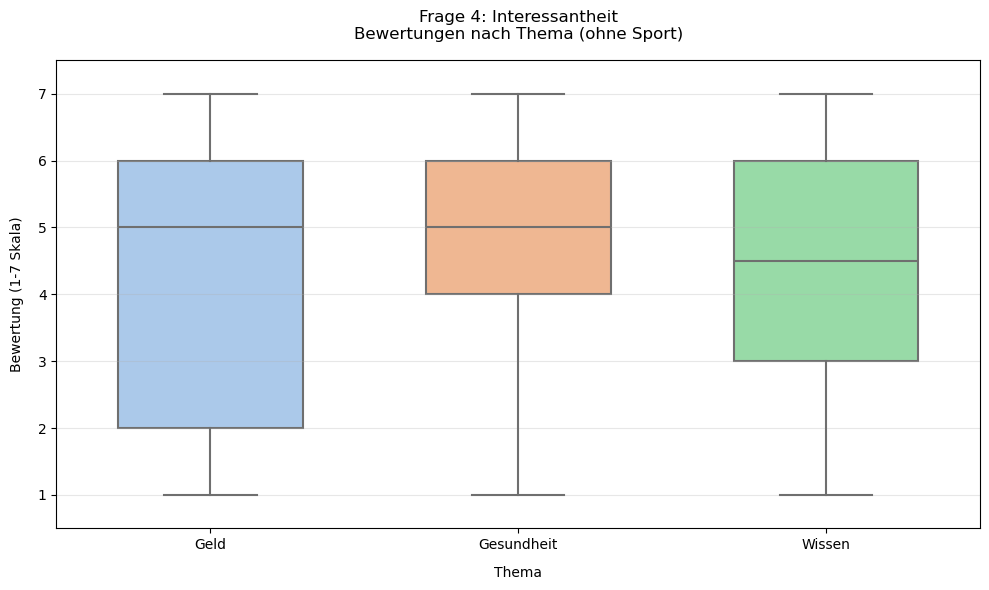


--- Frage 5: Vertrauen ---
Deskriptive Statistiken:
            count      mean       std  min  25%  50%  75%  max
Thema                                                         
Geld         36.0  4.583333  1.537623  2.0  3.0  5.0  6.0  7.0
Gesundheit   36.0  4.750000  1.360147  2.0  4.0  5.0  6.0  7.0
Wissen       36.0  4.000000  1.454058  1.0  3.0  4.0  5.0  7.0

ANOVA: F = 2.65, p = 0.0756


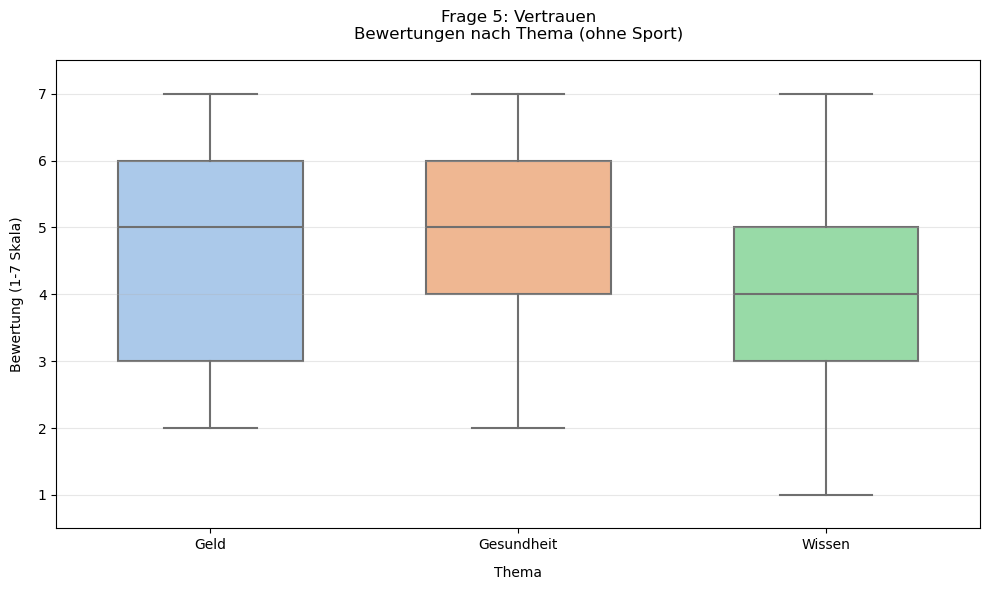


--- Frage 6: Sachlichkeit ---
Deskriptive Statistiken:
            count      mean       std  min  25%  50%   75%  max
Thema                                                          
Geld         36.0  5.416667  1.227657  2.0  5.0  6.0  6.00  7.0
Gesundheit   36.0  5.555556  0.939436  3.0  5.0  6.0  6.00  7.0
Wissen       36.0  4.055556  1.722862  1.0  3.0  4.0  5.25  7.0

ANOVA: F = 13.85, p = 0.0000

Post-hoc Tukey HSD Tests:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
      Geld Gesundheit   0.1389 0.8985   -0.61  0.8878  False
      Geld     Wissen  -1.3611 0.0001   -2.11 -0.6122   True
Gesundheit     Wissen     -1.5    0.0 -2.2489 -0.7511   True
------------------------------------------------------------


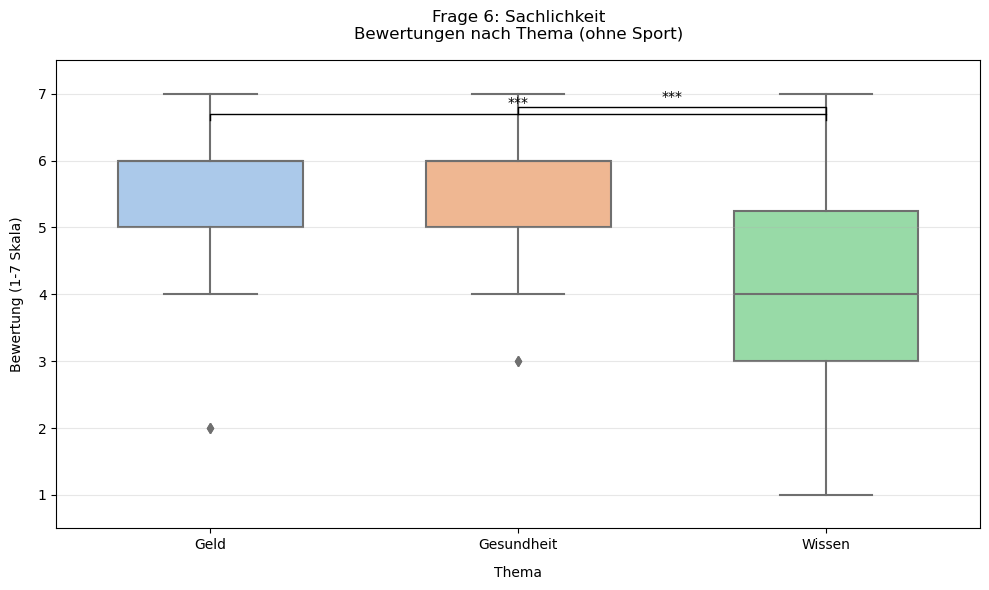


--- Frage 7: Fachkompetenz ---
Deskriptive Statistiken:
            count      mean       std  min   25%  50%  75%  max
Thema                                                          
Geld         36.0  5.055556  1.193900  2.0  4.75  5.0  6.0  7.0
Gesundheit   36.0  5.250000  1.079021  2.0  5.00  5.0  6.0  7.0
Wissen       36.0  4.194444  1.237958  1.0  4.00  4.0  5.0  7.0

ANOVA: F = 8.27, p = 0.0005

Post-hoc Tukey HSD Tests:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
      Geld Gesundheit   0.1944 0.7618 -0.4624  0.8513  False
      Geld     Wissen  -0.8611 0.0066  -1.518 -0.2043   True
Gesundheit     Wissen  -1.0556 0.0007 -1.7124 -0.3987   True
------------------------------------------------------------


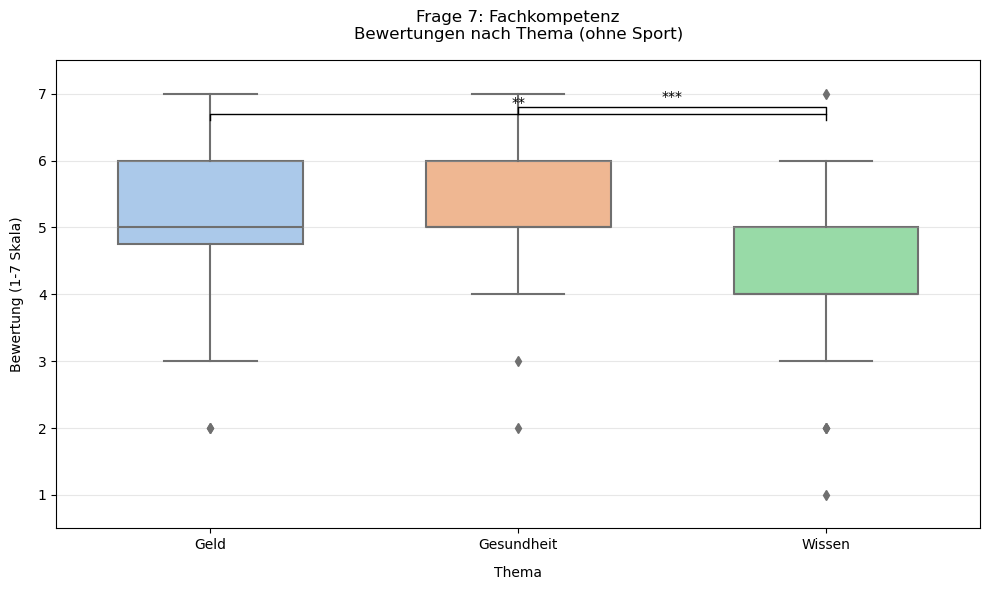


--- Frage 8: Vertrauen in Informationen ---
Deskriptive Statistiken:
            count      mean       std  min  25%  50%  75%  max
Thema                                                         
Geld         36.0  4.666667  1.414214  2.0  4.0  5.0  6.0  7.0
Gesundheit   36.0  4.833333  1.383577  1.0  4.0  5.0  6.0  7.0
Wissen       36.0  3.750000  1.556094  1.0  3.0  3.0  5.0  7.0

ANOVA: F = 5.80, p = 0.0041

Post-hoc Tukey HSD Tests:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
      Geld Gesundheit   0.1667 0.8778 -0.6477   0.981  False
      Geld     Wissen  -0.9167 0.0233  -1.731 -0.1023   True
Gesundheit     Wissen  -1.0833 0.0058 -1.8977  -0.269   True
------------------------------------------------------------


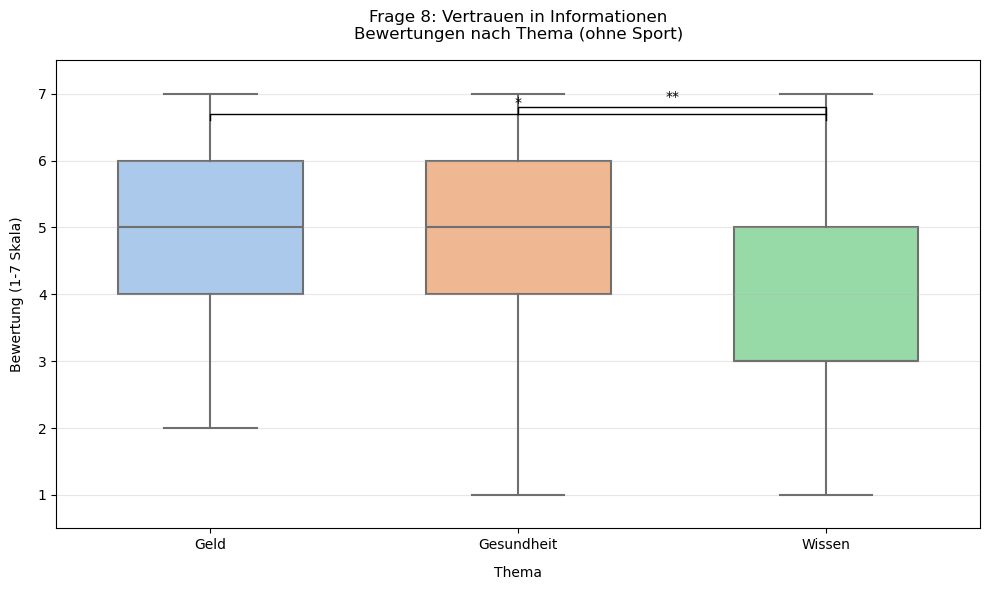


--- Frage 9: Missverständnispotential ---
Deskriptive Statistiken:
            count      mean       std  min  25%  50%  75%  max
Thema                                                         
Geld         36.0  3.083333  1.380993  1.0  2.0  3.0  4.0  7.0
Gesundheit   36.0  2.555556  0.998411  1.0  2.0  2.0  3.0  5.0
Wissen       36.0  3.250000  1.421770  2.0  2.0  3.0  4.0  6.0

ANOVA: F = 2.88, p = 0.0605


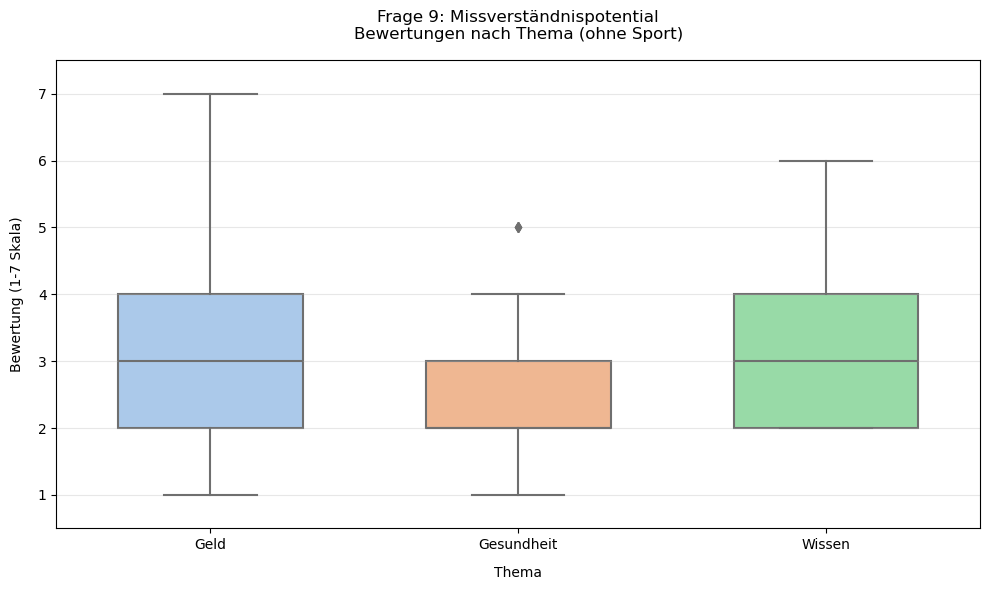

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Daten laden
ai_data = pd.read_csv('ai_labelled_with_ati.csv')
human_data = pd.read_csv('human_labelled_with_ati.csv')
data = pd.concat([ai_data, human_data])

# Fragenkatalog
questions = {
    1: "Vorwissen",
    2: "Glaubwürdigkeit",
    3: "Verständlichkeit",
    4: "Interessantheit",
    5: "Vertrauen",
    6: "Sachlichkeit",
    7: "Fachkompetenz",
    8: "Vertrauen in Informationen",
    9: "Missverständnispotential"
}

# Themen, die analysiert werden sollen (ohne Sport)
themes = ['Geld', 'Gesundheit', 'Wissen']

def analyze_questions_separately():
    for q_num, q_name in questions.items():
        # Daten für diese Frage extrahieren
        q_data = pd.DataFrame()
        for theme in themes:
            # Finde die passende Spalte für diese Frage und Thema
            col_pattern = f"{theme} - {q_num}."
            matching_cols = [col for col in data.columns if col.startswith(col_pattern)]
            if matching_cols:
                q_data[theme] = data[matching_cols[0]]
        
        # Daten für Visualisierung vorbereiten
        melted_data = pd.melt(q_data, 
                            value_vars=themes,
                            var_name='Thema', 
                            value_name='Bewertung')
        
        # Boxplot erstellen
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Thema', y='Bewertung', 
                   data=melted_data, 
                   palette='pastel', 
                   width=0.6,
                   order=themes)
        
        plt.title(f'Frage {q_num}: {q_name}\nBewertungen nach Thema (ohne Sport)', pad=15)
        plt.xlabel('Thema', labelpad=10)
        plt.ylabel('Bewertung (1-7 Skala)', labelpad=10)
        plt.ylim(0.5, 7.5)
        
        # ANOVA durchführen
        groups = [melted_data[melted_data['Thema'] == t]['Bewertung'] 
                 for t in themes]
        
        # Deskriptive Statistiken ausgeben
        print(f"\n--- Frage {q_num}: {q_name} ---")
        print("Deskriptive Statistiken:")
        print(melted_data.groupby('Thema')['Bewertung'].describe())
        
        # ANOVA nur durchführen wenn genug Daten vorhanden sind
        if all(len(g) > 1 for g in groups):
            f_stat, p_val = stats.f_oneway(*groups)
            print(f"\nANOVA: F = {f_stat:.2f}, p = {p_val:.4f}")
            
            # Signifikanzmarkierungen im Plot
            if p_val < 0.05:
                from statsmodels.stats.multicomp import pairwise_tukeyhsd
                print("\nPost-hoc Tukey HSD Tests:")
                tukey = pairwise_tukeyhsd(melted_data['Bewertung'],
                                        melted_data['Thema'],
                                        alpha=0.05)
                print(tukey)
                
                # Signifikante Unterschiede im Plot markieren
                y_pos = 6.5
                h = 0.1
                
                # Vergleiche zwischen allen Themenpaaren
                comparisons = [(0,1), (0,2), (1,2)]  # Indizes der Themen in der Liste
                for i, (idx1, idx2) in enumerate(comparisons):
                    group1 = themes[idx1]
                    group2 = themes[idx2]
                    data1 = melted_data[melted_data['Thema'] == group1]['Bewertung']
                    data2 = melted_data[melted_data['Thema'] == group2]['Bewertung']
                    
                    # t-Test zwischen den beiden Gruppen
                    t_stat, p_val_pair = stats.ttest_ind(data1, data2, equal_var=False)
                    
                    if p_val_pair < 0.05:
                        plt.plot([idx1, idx1, idx2, idx2], 
                                [y_pos + i*h, y_pos + i*h + 0.1, y_pos + i*h + 0.1, y_pos + i*h], 
                                lw=1, color='black')
                        if p_val_pair < 0.001:
                            symbol = '***'
                        elif p_val_pair < 0.01:
                            symbol = '**'
                        elif p_val_pair < 0.05:
                            symbol = '*'
                        plt.text((idx1+idx2)*0.5, y_pos + i*h + 0.15, 
                                symbol, ha='center', va='bottom', color='black')
        else:
            print("\nNicht genug Daten für ANOVA")
        
        plt.tight_layout()
        plt.grid(axis='y', alpha=0.3)
        plt.show()

# Analyse durchführen
analyze_questions_separately()